<a href="https://colab.research.google.com/github/fergogu27-ctrl/EDPII/blob/main/Ecuaci%C3%B3n_del_Calor_M%C3%A9todo_impl%C3%ADcito_de_Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ecuación del Calor**

# **Método implícito de Crank-Nicolson**

Tenemos la solución de la ecuación
$$\frac{\partial u}{\partial t}(x,t) =  \frac{\partial^2 u}{\partial x^2}(x,t)=0     \ \ \ \ 0<x<1 $$

sujeta a las condiciones de frontera:
$$u=0 \ \ \ en \ \ \ x=0, \ \ x=1, \ \ t \geq 0$$
$$u=1-4 (x-0.5)^2 \ \ \ para \ \ \ t=0 \ \ \ 0\le x \le 1$$
$$h=0.1$$

En esta solución vista en clase podemos recordar como calcular las matrices para tener la factorización LU y vamos a codificar el metodo para obtener las grtaficas y ver la solución.

In [1]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # necesario para 3D
from matplotlib import cm                 # colormap
from tabulate import tabulate #para que sirve la libreria, para hacer ma tabla mas estetica

Definimos la función que en el inicio del documento no indica la restricción.

In [2]:
def f(x):
  return 1 - 4 * (x-0.5)**2 #Función del método

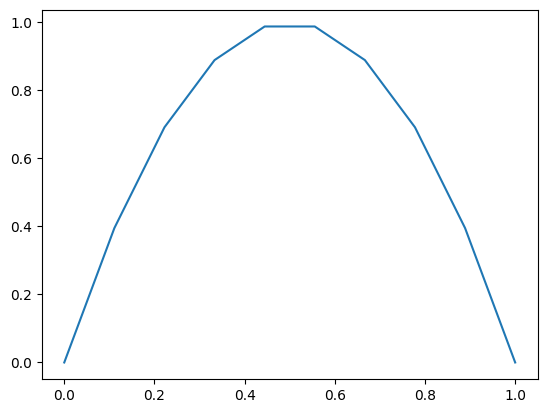

In [3]:
x = np.linspace(0,1,10) #grafica de la función
plt.plot(x,f(x))

En la tarea anterior pudimos resolver el como simplificar una matriz tridiaginal, de igual manera vamos a calcular las matrices vistas en clase

In [4]:
def tridiagonal(n,a,b):
  return sp.Matrix([
      [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
      for i in range(n)])

Ya que tenemos definida la función del como se comporta la matriz tridiagonal, calculamos la matriz A con la valores obtenidos

In [5]:
r=1 #valor de r

In [6]:
A=tridiagonal(9, 2+2*r,-r)

In [7]:
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

Calculamos la Matriz B

In [8]:
B=tridiagonal(9, 2-2*r,r)
B

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

En nuestros resultados obtenidos de las ecuacuiones tenemos un vector multiplicado por la Matriz B.
Definimos el vector b.

In [9]:
b=sp.Matrix([f(0.1*(i+1)) for i in range(9)])
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

Con estas matrices y vector podemos definir la funcion de Crank Nicolson, el proceso es similar al método anterior.

In [10]:
def crank_nicolson(A,B,b,j):
  b_1=B*b      #mismo paso inicial de tu función
  S=[]          #guarda ceros en cada solución

  for i in range(j):
    sol = A.LUsolve(b_1)    #u^(n+1)
    S.append(sol.T)         #guardar fila(como vector renglón)
    b_1 = B*sol             #preparar siguiente paso

  #Convertir lsita de vectores sympy a una matriz sy=py
  return sp.Matrix(S)

In [11]:
j=10    #Cuantas iteraciones se realiza

In [12]:
U=  crank_nicolson(A,B,b,j);    #definimos a u como la funcion de crank

**Ejercicio 1.** Obtenga una tabla similar a la tabla 2.6 de la imagen adjunta y use esta para verificar que su código es correcto. Observe hasta que valor de t llega. Use la librería tabulate. En la en clase pusimos j=50 pero en la imagen de referencia t llega a t=0.1 por lo tanto j seria j=10.


In [13]:
data = [list(U.row(i)) for i in range(U.rows)]
print(tabulate(data, tablefmt="grid") )     #Tabla de las iteraciones

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

In [14]:
x = np.linspace(0, 1, 9)    #Numero de nodos internos en x
y = np.linspace(0, 0.5, j)  #debe coincidir con el tamaño de j por h(tiempo)
X, Y = np.meshgrid(x,y)

In [15]:
U_np = np.array(U.tolist(), dtype=float)

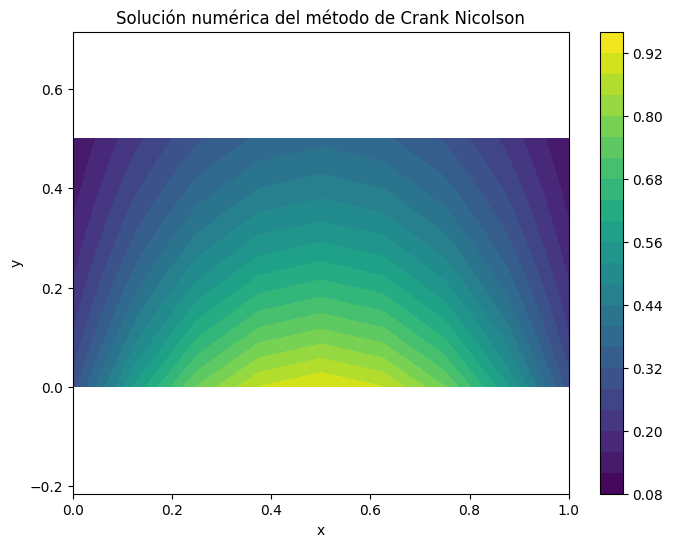

In [16]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title("Solución numérica del método de Crank Nicolson")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

Ahora definimos la solución exacta del problema es un poco larga por las condiciones de frontera

In [17]:
t=0
nx = len(x)
nt = len(y)

In [31]:
u_exacta = np.zeros((nt, nx))

for i in range(nt):
    t = y[i]
    for j in range(nx):
        u_exacta[i,j] = np.exp(-4*np.pi**2*t) * f(x[j])

In [34]:
data = [list(u_exacta[i]) for i in range(u_exacta.shape[0])]
print(tabulate(data, tablefmt="grid") )     #Tabla de las iteraciones

+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
| 0.36        | 0.64        | 0.84        | 0.96        | 1           | 0.96        | 0.84        | 0.64        | 0.36        |
+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
| 0.0401595   | 0.0713946   | 0.0937055   | 0.107092    | 0.111554    | 0.107092    | 0.0937055   | 0.0713946   | 0.0401595   |
+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
| 0.00447996  | 0.00796437  | 0.0104532   | 0.0119465   | 0.0124443   | 0.0119465   | 0.0104532   | 0.00796437  | 0.00447996  |
+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
| 0.000499758 | 0.000888458 | 0.0011661   | 0.00133269  | 0.00138822  | 0.00133269  | 0.0011661   | 0.00

Teniendo ambas soluciones podemos calcular el error a continuación

In [20]:
Error = np.abs(U_np - u_exacta)

In [21]:
error_max = np.max(Error)
print("Error máximo =", error_max)

Error máximo = 0.7540283589346282


Vemos como es que se compratan las graficas de calor de ambas solcuciones como en la solucion exacta se llega rapido a la soluciones mientars que por el método Crank Nicolson tarda un poco mas en cada iteración.

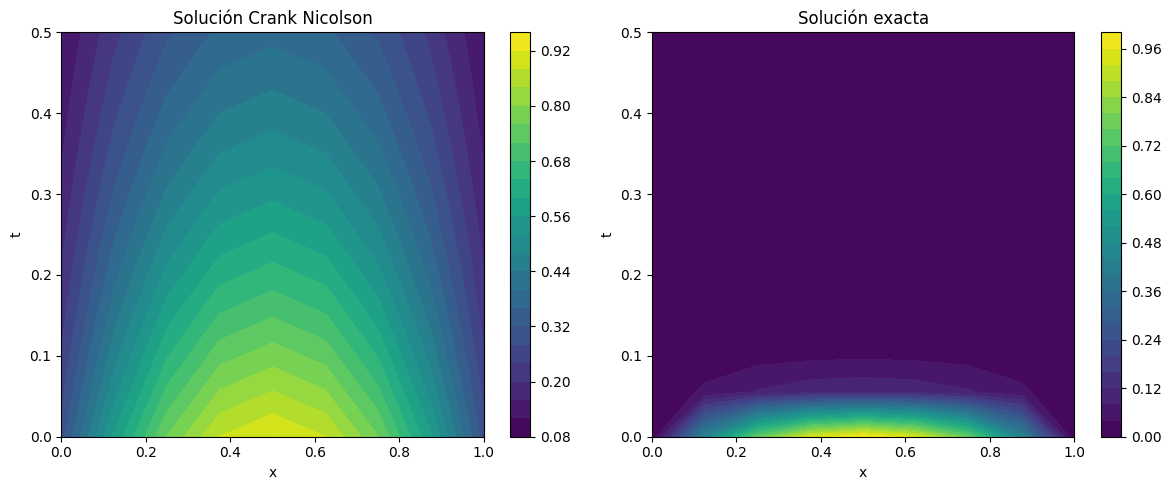

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
cont1 = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(cont1)
plt.title("Solución Crank Nicolson")
plt.xlabel("x")
plt.ylabel("t")
plt.subplot(1,2,2)
cont2 = plt.contourf(X, Y, u_exacta, levels=25, cmap=cm.viridis)
plt.colorbar(cont2)
plt.title("Solución exacta")
plt.xlabel("x")
plt.ylabel("t")

plt.tight_layout()
plt.show()

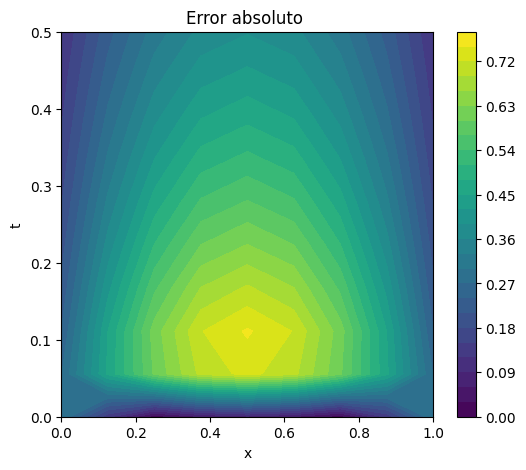

In [23]:
plt.figure(figsize=(6,5))
cont3 = plt.contourf(X, Y, Error, levels=25, cmap=cm.viridis)
plt.colorbar(cont3)
plt.title("Error absoluto ")
plt.xlabel("x")
plt.ylabel("t")
plt.show()

In [24]:
x = np.linspace(0.1, 0.9, 9)
error_max = np.random.rand(len(x))

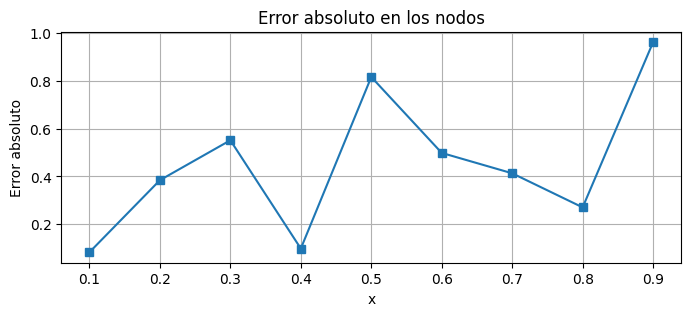

In [25]:
plt.figure(figsize=(8,3))
plt.plot(x, error_max, marker='s')
plt.xlabel('x')
plt.ylabel('Error absoluto')
plt.title('Error absoluto en los nodos')
plt.grid(True)
plt.show()

**Ejercicio 2:** La tabla 2.7 de la imagen adjunta contiene los valores reales de la solución. Use su código para graficar en un mismo panel su solución numérica y la solución real. Determine el error de su solución.

Ahora vemos la comparación de ambas soluciones en este caso ponemos t=0 para ver la compración desde la primera iteración porque como vimos en las graficas anteriores la solución exacta converge muy rapido y si ponemos un t>0 no podemos ver muy bien la comparación

In [26]:
t_index = 0    # índice del tiempo que quieres graficar (último)
t = y[t_index]

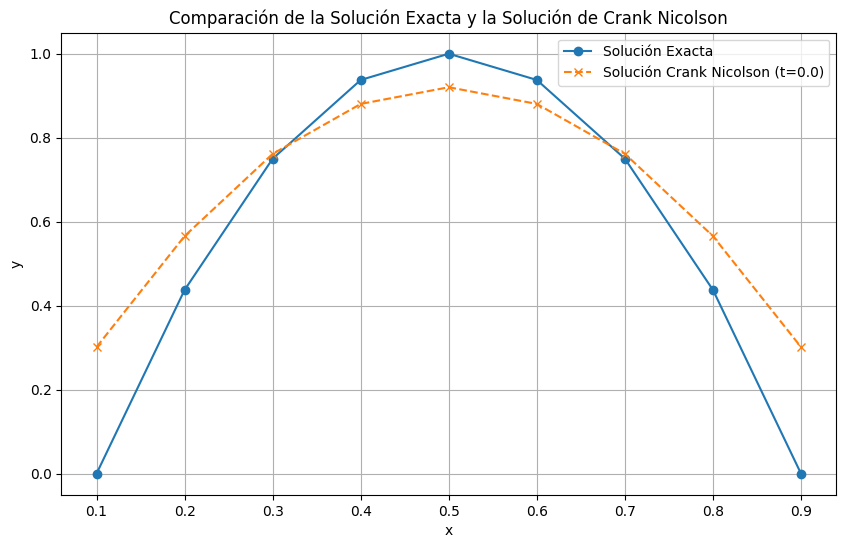

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(x, u_exacta[t_index, :] , marker='o', linestyle='-', label='Solución Exacta')
plt.plot(x, U_np[t_index, :] , marker='x', linestyle='--', label=f'Solución Crank Nicolson (t={t})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de la Solución Exacta y la Solución de Crank Nicolson')
plt.legend()
plt.grid(True)
plt.show()

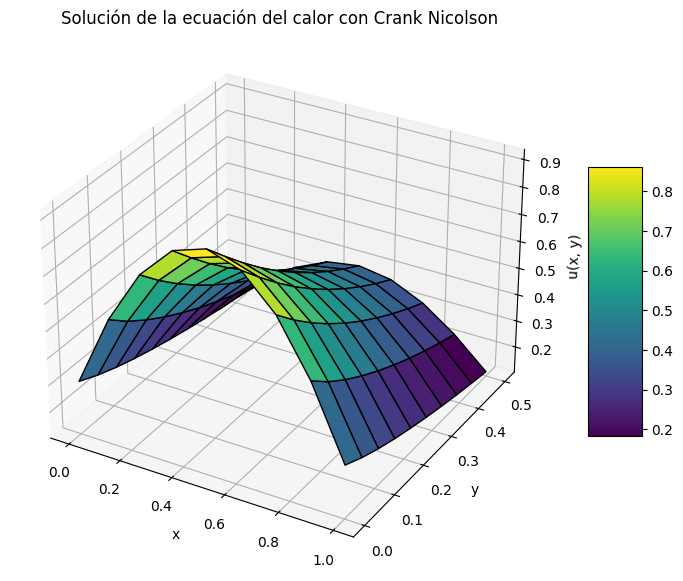

In [28]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Crank Nicolson')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

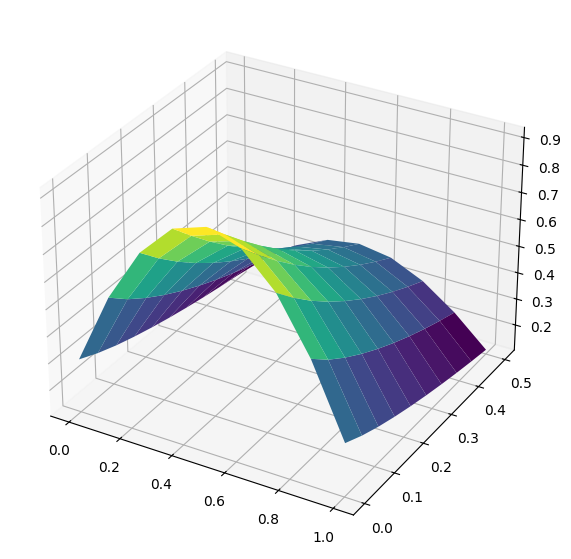

In [29]:
%matplotlib inline
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis)
plt.show()

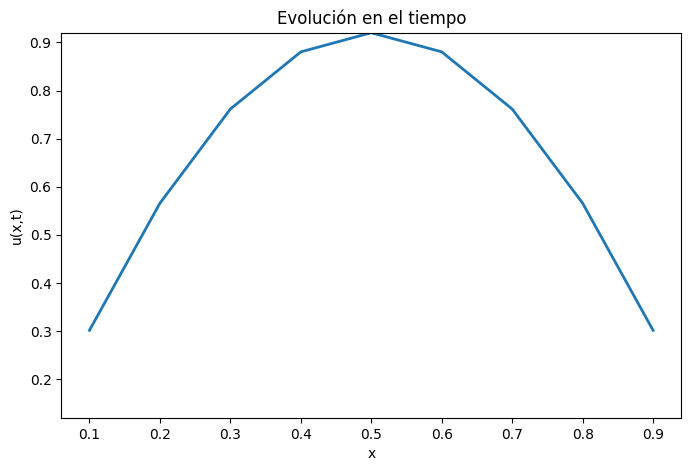

In [30]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U_np[0], lw=2)
ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U_np[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()